<a style="float:left;" href="https://colab.research.google.com/github/ClaudeCoulombe/VIARENA/blob/master/Labos/Lab-MNIST/Identification_ChiffresManuscrits-MNIST.ipynb" target="_blank"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>
<br/>
### Rappel - Fonctionnement d'un carnet web iPython

* Pour exécuter le code contenu dans une cellule d'un carnet iPython, cliquez dans la cellule et faites (⇧↵, shift-enter);
* Le code d'un carnet iPython s'exécute séquentiellement de haut en bas de la page. Souvent, l'importation d'une bibliothèque Python ou l'initialisation d'une variable est préalable à l'exécution d'une cellule située plus bas. Il est donc recommandé d'exécuter les cellules en séquence. Enfin, méfiez-vous des retours en arrière qui peuvent réinitialiser certaines variables;
* Pour obtenir de l'information sur une fonction, utilisez la commande Python `help(`"nom de la fonction"`)`

# Identification de chiffres manuscrits - jeu de données MNIST
## Utilisation d'un perceptron multicouche (PMC)

#### Inspiration: 

Michael Nielsen, http://neuralnetworksanddeeplearning.com/

Grant Sanderson, https://www.youtube.com/watch?v=Ilg3gGewQ5U

## Importation des bibliothèques Python

In [50]:
import os
import matplotlib.pyplot as plt

import tensorflow as tf
print("TensorFlow version:",tf.__version__)
import keras
print("Keras version:",keras.__version__)

TensorFlow version: 2.4.1
Keras version: 2.4.3


## Jeu de données - chiffres manuscrits MNIST

Le jeu de données MNIST (Modified National Institute of Standards and Technology) comporte 60,000 images en tons de gris de 28×28 pixels de chiffres manuscrits étiquetés de 0 à 9. Site web: http://yann.lecun.com/exdb/mnist/

Il est incorporé dans keras.datasets 

### Lecture des données
### Séparation entre jeu de données d'entraînement et jeux de données de test

In [51]:
# le jeu de données MNIST
from keras.datasets import mnist

dic_noms_classe = { 
    0 : "0",
    1 : "1",
    2 : "2",
    3 : "3",
    4 : "4",
    5 : "5",
    6 : "6",
    7 : "7",
    8 : "8",
    9 : "9",
}

# lire le jeu de données MNIST et le diviser entre
# les données d'entrainement et les données de test
(attributs_entrainement, classes_cibles_entrainement), (attributs_test, classes_cibles_test) = mnist.load_data()


## Exploration des données

### Portrait des données

In [52]:
# Portrait des données 
print()
print('Entraînement: attributs=%s, classes=%s' % (attributs_entrainement.shape, classes_cibles_entrainement.shape))
print('Test: attributs=%s, classes=%s' % (attributs_test.shape, classes_cibles_test.shape))


Entraînement: attributs=(60000, 28, 28), classes=(60000,)
Test: attributs=(10000, 28, 28), classes=(10000,)


### Visualisation de données


Quelques images avec leur étiquette de classe-cible...


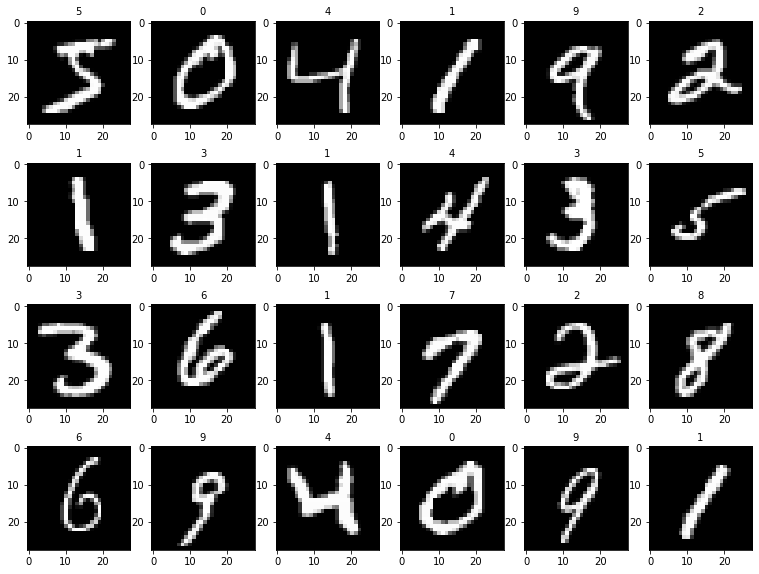

In [53]:
# Afficher les 24 premières images
print()
print("Quelques images avec leur étiquette de classe-cible...")
%matplotlib inline
# définir subplot
fig, axes = plt.subplots(nrows=4,ncols=6,figsize=(13,10))
for i_rangee in range(0,4):
    for i_colonne in range(0,6):
        axes[i_rangee,i_colonne].set_title(dic_noms_classe[int(classes_cibles_entrainement[i_rangee*6+i_colonne])],
                                           fontsize=10)
        axes[i_rangee,i_colonne].imshow(attributs_entrainement[i_rangee*6+i_colonne],cmap='gray')
plt.show()

## Préparation des données

### Linéariser les attributs des images 28 x 28 pixels en 784 attributs

In [54]:
# Linéariser les attributs des images 28 x 28 pixels en 784 attributs
nombre_attributs = attributs_entrainement.shape[1]*attributs_entrainement.shape[1]
print("nombre_attributs:",nombre_attributs)
attributs_entrainement = attributs_entrainement.reshape(attributs_entrainement.shape[0], nombre_attributs)
attributs_test = attributs_test.reshape(attributs_test.shape[0], nombre_attributs)
print("Linéarisation des attributs des images terminée!")

nombre_attributs: 784
Linéarisation des attributs des images terminée!


### Conversion des étiquettes-cibles en vecteurs binaires à un bit discriminant

In [55]:
# Conversion des étiquettes-cibles en vecteurs binaires à un bit discriminant
from keras.utils import to_categorical
classes_cibles_entrainement = to_categorical(classes_cibles_entrainement)
classes_cibles_test = to_categorical(classes_cibles_test)
print("Conversion des étiquettes-cibles en vecteurs binaires terminée!")

Conversion des étiquettes-cibles en vecteurs binaires terminée!


### Normalisation des images

In [56]:
# Normalisation
def normalisation(entrainement, test):
    # convertir de nombres entiers à nombres décimaux
    entrainement_normalise = entrainement.astype('float32')
    test_normalise = test.astype('float32')
    # normalisation à un nombre entre 0 et 1
    entrainement_normalise = entrainement_normalise / 255.0
    test_normalise = test_normalise / 255.0
    return entrainement_normalise, test_normalise

attributs_entrainement, attributs_test = normalisation(attributs_entrainement, attributs_test)

print("Normalisation des images terminée!")

Normalisation des images terminée!


## Construction d'un modèle de perceptron multicouche (PMC)

In [57]:
# Construction du modèle

from keras.models import Sequential
from keras.layers import Dense

print("Création d'un modèle de base...")

dimension_entree = (nombre_attributs,)
nombre_classes_cibles = 10

modele_de_base = Sequential()

# Apprentissage et extraction des attributs
modele_de_base.add(Dense(16, activation='relu', input_shape=dimension_entree))
modele_de_base.add(Dense(16, activation='relu'))

# Classification des images
modele_de_base.add(Dense(nombre_classes_cibles, 
                         activation='softmax'))

print()
print("Description du modèle de base:")
modele_de_base.summary()

Création d'un modèle de base...

Description du modèle de base:
Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 16)                12560     
_________________________________________________________________
dense_10 (Dense)             (None, 16)                272       
_________________________________________________________________
dense_11 (Dense)             (None, 10)                170       
Total params: 13,002
Trainable params: 13,002
Non-trainable params: 0
_________________________________________________________________


## Compilation du modèle

In [58]:
# Compilation du modèle

print()
print("Compilation du modèle...")

modele_de_base.compile(loss="categorical_crossentropy", 
                       optimizer="sgd", 
                       metrics=["accuracy"])


Compilation du modèle...


## Entraînement du modèle

In [59]:
# Entraînement du modèle

print()
print("Entraînement du modèle...")

batch_size = 128
epochs = 15
taille_jeu_validation = 0.1

traces_entrainement = modele_de_base.fit(attributs_entrainement, 
                                         classes_cibles_entrainement,
                                         batch_size=batch_size,
                                         epochs=epochs,
                                         validation_split=taille_jeu_validation)


Entraînement du modèle...
Epoch 1/15
422/422 [==============================] - 2s 3ms/step - loss: 2.1342 - accuracy: 0.2057 - val_loss: 1.4756 - val_accuracy: 0.6193
Epoch 2/15
422/422 [==============================] - 1s 2ms/step - loss: 1.2864 - accuracy: 0.6567 - val_loss: 0.6988 - val_accuracy: 0.8323
Epoch 3/15
422/422 [==============================] - 1s 3ms/step - loss: 0.7113 - accuracy: 0.8040 - val_loss: 0.4947 - val_accuracy: 0.8692
Epoch 4/15
422/422 [==============================] - 1s 2ms/step - loss: 0.5604 - accuracy: 0.8394 - val_loss: 0.4156 - val_accuracy: 0.8853
Epoch 5/15
422/422 [==============================] - 1s 2ms/step - loss: 0.4910 - accuracy: 0.8591 - val_loss: 0.3749 - val_accuracy: 0.8953
Epoch 6/15
422/422 [==============================] - 1s 3ms/step - loss: 0.4533 - accuracy: 0.8674 - val_loss: 0.3464 - val_accuracy: 0.9040
Epoch 7/15
422/422 [==============================] - 1s 2ms/step - loss: 0.4175 - accuracy: 0.8788 - val_loss: 0.3266 - 

## Évaluation du modèle avec un jeu de données test

In [63]:
# Évaluation du modèle

print()
print("Évaluation du modèle...")

resultats = modele_de_base.evaluate(attributs_test, classes_cibles_test, verbose=0)
print("Exactitude test: {:.2f}%".format(resultats[1]*100))


Évaluation du modèle...
Exactitude test: 91.39%


**Note:** On constate une perte d'environ -1% entre l'exactitude sur le jeu de données de test et l'exactitude sur du jeu de données d'entraînement. Cette différence s'explique par le surajustement (en anglais, overfitting).  

## Affichage des courbes d'entraînement: erreur et exactitude

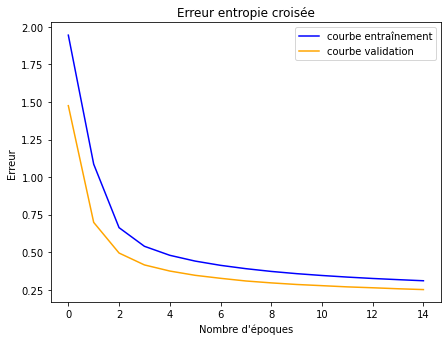

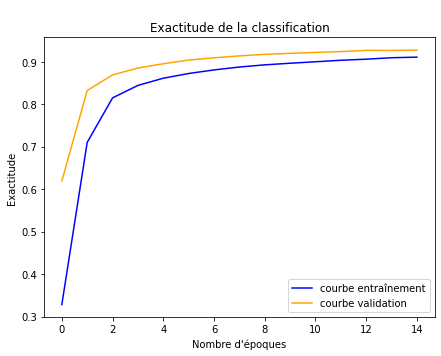

In [72]:
# Affichage des courbes d'entraînement
hauteur = 7
plt.subplots(figsize=(hauteur,1.618*hauteur))
plt.subplot(211)
plt.title('Erreur entropie croisée')
plt.plot(traces_entrainement.history['loss'], color='blue', label='courbe entraînement')
plt.plot(traces_entrainement.history['val_loss'], color='orange', label='courbe validation')
plt.ylabel("Erreur")
plt.xlabel("Nombre d'époques")
plt.legend()
plt.show()
# tracer l'exactitude
plt.subplots(figsize=(hauteur,1.618*hauteur))
plt.subplot(212)
plt.title('\nExactitude de la classification')
plt.plot(traces_entrainement.history['accuracy'], color='blue', label='courbe entraînement')
plt.plot(traces_entrainement.history['val_accuracy'], color='orange', label='courbe validation')
plt.ylabel("Exactitude")
plt.xlabel("Nombre d'époques")
plt.legend()
plt.show()

In [71]:
print("Exécution carnet IPython terminée!")

Exécution carnet IPython terminée!
